Enter a Pokemon to use in battle: squirtle


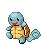

Squirtle I Choose you


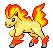

A wild Ponyta appeared

1) Attack       2) Use Items    3) Check Stats  4) Run Away    
Choose an action by entering 1, 2, 3, or 4: 1

1) Bubble       2) Hydro pump   3) Surf         4) Water gun
Choose an attack by entering 1, 2, 3, or 4: 3


Squirtle used Surf It was super effective
Ponyta now has 52 HP remaining

Ponyta used Flamethrower It was not very effective
Squirtle now has 69 HP remaining

1) Attack       2) Use Items    3) Check Stats  4) Run Away    
Choose an action by entering 1, 2, 3, or 4: 2

1) 3 Potion     2) 3 Pokeball    
Choose an item by entering 1 or 2: 1

Trainer used Superpotion Squirtle healed for 50 HP. Squirtle now has 108 HP

Ponyta used Ember It was not very effective
Squirtle now has 69 HP remaining

1) Attack       2) Use Items    3) Check Stats  4) Run Away    
Choose an action by entering 1, 2, 3, or 4: 3


Squirtle     Level:       52           Max HP:  108          Current Health:  69           Type:  Water
Ponyta       Level:       47           Max 

In [18]:
import csv
import random
from IPython.display import Image, display

with open("Pokedex.csv", 'rt') as a:
    b = csv.reader(a)
    pokedex = [row for row in b]
    
with open("Moves.csv", 'rt') as c:
    d = csv.reader(c)
    moves_list = [row for row in d]
    
with open("Effectiveness.csv", 'rt') as c:
    d = csv.reader(c)
    effect_list = [row for row in d]
    
class Pokemon():
    
    def __init__(self, name, csvrow):
        self.name = csvrow[1]
        self.dex = csvrow[0]
        self.poketype = csvrow[2]
        self.hp = csvrow[3]
        self.atk = csvrow[4]
        self.defense = csvrow[5]
        self.spatk = csvrow[6]
        self.spdef = csvrow[7]
        self.speed = csvrow[8]
        self.total = csvrow[9]
        self.level = random.randint(40,60)           #Keeping all pokemon between lvl 40 and 60 for fairness
        self.health_begin = ((int(self.hp) * 2) * self.level / 100) + 10 + self.level
        self.health = self.health_begin
        self.image_path = csvrow[10]
        
    def __str__(self):
        return self.name
    
    def display_image(self):
        if self.image_path is not None:
            display(Image(filename = self.image_path))
    
    #calculates the remaining life
    def life(self, damage):
        if self.health <= 0:
            self.health = 0
        else:
            self.health -= damage
            if self.health <= 0:
                self.health = 0
        
class Moves():
    
    def __init__(self, name):
        self.name = name
        self.movetype = None
        self.pokemontype = None
        self.power = None
        self.accuracy = None
        self.effect = None
        
    def __str__(self):
        return self.name

class items():

    def __init__(self, name):
        self.name = name
        
    def __str__(self):
        return self.name
    
class potion(items):

    def __init__(self, name):
        super().__init__(name)
        self.heal = 50
        self.count = 3
        
    def use(self):
        self.count -= 1
        
class pokeball(items):

    def __init__(self, name, opponent):
        super().__init__(name)
        self.count = 3
    
    #Calculates the % chance of capturing a pokemon
    def use(self, opponent):
        self.chance = round((opponent.health / int(opponent.health_begin)) * 100)
        if random.randint(0, self.chance) < 10:
            self.capture = 'Captured'
        else:
            self.capture = 'Broke Free'
        self.count -= 1
        
class trainer_actions():
    
    def __init__(self):
        self.name = name
        
    def __str__(self):
        return self.name
    
    def attack():
        print('\n%s %-12s %s %-12s %s %-12s %s %s' % ('1)', trainer_moves[0], '2)', trainer_moves[1], 
                                                     '3)', trainer_moves[2], '4)', trainer_moves[3]))
        try:
            user_attack = int(input('Choose an attack by entering 1, 2, 3, or 4: ')) - 1
            print('\n')
            print(trainer_pokemon, 'used', trainer_moves[user_attack], 
                    effect(trainer_pokemon, trainer_moves[user_attack]))
            opponent_pokemon.life(damage(trainer_pokemon, trainer_moves[1]))
            if opponent_pokemon.health == 0:
                print(opponent_pokemon, 'fainted')
            else:
                print(opponent_pokemon, 'now has', round(opponent_pokemon.health), 'HP remaining\n')
        except:
            print('You did not enter in a possible move')
            user_attack = int(input('Choose an attack by entering 1, 2, 3, or 4: ')) - 1
            print('\n')
            print(trainer_pokemon, 'used', trainer_moves[user_attack], 
                    effect(trainer_pokemon, trainer_moves[user_attack]))
            opponent_pokemon.life(damage(trainer_pokemon, trainer_moves[1]))
            if opponent_pokemon.health == 0:
                print(opponent_pokemon, 'fainted')
            else:
                print(opponent_pokemon, 'now has', round(opponent_pokemon.health), 'HP remaining\n')
            
    def items():
        print('\n%s %s %-10s %s %s %-12s' % ('1)', Superpotion.count, 'Potion', 
                                             '2)', Pokeball.count, 'Pokeball'))
        item_use = int(input('Choose an item by entering 1 or 2: '))
        Pokeball.capture = ()
        if item_use == 1:
            if Superpotion.count == 0:
                print('You are out of Potions\n')
            else:
                trainer_pokemon.health = trainer_pokemon.health + Superpotion.heal
                Superpotion.use()
                if trainer_pokemon.health > trainer_pokemon.health_begin:
                    trainer_pokemon.health = trainer_pokemon.health_begin
                print('\nTrainer used Superpotion', trainer_pokemon, 'healed for 50 HP.',
                      trainer_pokemon, 'now has', round(trainer_pokemon.health), 'HP\n')
        elif item_use == 2:
            if Pokeball.count == 0:
                print('You are out of Pokeballs\n')
            else:
                Pokeball.use(opponent_pokemon)
                if Pokeball.capture == 'Captured':
                    print('You have captured', opponent_pokemon)
                else:
                    print(opponent_pokemon, Pokeball.capture, '\n')
        else:
            print('You have entered an unavailable option')
            item_use = int(input('Choose an item by entering 1 or 2: '))
                    
    def check_stats():
        print('\n')
        print('%-12s %-12s %-12s %s %-12s %s %-12s %s %s' % (trainer_pokemon, 'Level: ', trainer_pokemon.level, 
                                                       'Max HP: ', round(trainer_pokemon.health_begin),
                                                       'Current Health: ', round(trainer_pokemon.health), 
                                                       'Type: ', trainer_pokemon.poketype))
        print('%-12s %-12s %-12s %s %-12s %s %-12s %s %s' % (opponent_pokemon, 'Level: ', opponent_pokemon.level, 
                                                       'Max HP: ', round(opponent_pokemon.health_begin),
                                                       'Current Health: ', round(opponent_pokemon.health), 
                                                       'Type: ', opponent_pokemon.poketype))
        print('\n')
        
class opponent_actions():
    
    def __init__(self):
        self.name = name
        
    def __str__(self):
        return self.name
    
    def attack():
        rand_move = random.randint(0,3)
        print(opponent_pokemon, 'used', opponent_moves[rand_move], 
                effect(opponent_pokemon, opponent_moves[rand_move]))
        trainer_pokemon.life(damage(opponent_pokemon, opponent_moves[1]))
        if trainer_pokemon.health == 0:
            print(trainer_pokemon, 'fainted')
        else:
            print(trainer_pokemon, 'now has', round(trainer_pokemon.health), 'HP remaining\n')
    
    def run_away():
        print(opponent_pokemon, 'ran away')
        
#Find row of pokemon in list pokedex
def csvrow(pokemon):
    for x in range(0,len(pokedex)):
        if (pokemon in pokedex[x]) == True:
            return int(pokedex[x][0])

#Uses Pokemon type to gather a list of possible moves adds instance to the class Move
def adding_moves(pokemon, player):
    for y in range(1, len(moves_list)):                           
        if pokemon.poketype == moves_list[y][2].capitalize():
            possible_move = Moves(moves_list[y][0].capitalize())
            possible_move.movetype = moves_list[y][1]
            possible_move.pokemontype = moves_list[y][2]
            possible_move.power = moves_list[y][3]
            possible_move.accuracy = moves_list[y][4]
            possible_move.effect = moves_list[y][5]
            player.append(possible_move)
        else:
            pass

#calculates the critical strike chance
def crit():
    if random.randint(0,100) >= 90:
        return 2
    else:
        return 1
                    
#calculates damage done by the attack
def damage(pokemon, move):
    if pokemon == trainer_pokemon:
        attack = int(trainer_pokemon.atk)
        defense = int(opponent_pokemon.atk)
        for x in range(0, len(effect_list)):
            if move.movetype == effect_list[x][0]:
                if opponent_pokemon.poketype.upper() == effect_list[x][1]:
                    effect = float(effect_list[x][2])
                    break
                else:
                    effect = 1
    else:
        attack = int(opponent_pokemon.atk)
        defense = int(trainer_pokemon.atk)
        for x in range(0, len(effect_list)):
            if move.movetype == effect_list[x][0]:
                if trainer_pokemon.poketype.upper() == effect_list[x][1]:
                    effect = float(effect_list[x][2])
                    break
                else:
                    effect =1
    modifier = 1 * effect * crit() * (random.randint(85,100) / 100)
    dmg = (((2 * pokemon.level + 10) / 250) * (attack / defense) * int(move.power) + 2) * modifier
    return dmg

#calculates the effectiveness of an attack
def effect(pokemon, move):
    if pokemon == trainer_pokemon:
        attack = int(trainer_pokemon.atk)
        defense = int(opponent_pokemon.atk)
        for x in range(0, len(effect_list)):
            if move.movetype == effect_list[x][0]:
                if opponent_pokemon.poketype.upper() == effect_list[x][1]:
                    effect = float(effect_list[x][2])
                    if effect == 2:
                        damage_mod = 'It was super effective'
                    elif effect == .5:
                        damage_mod = 'It was not very effective'
                    elif effect == 0:
                        damage_mod = 'It was not effective'
                    break
                else:
                    effect = 1
                    damage_mod = ''
    else:
        attack = int(opponent_pokemon.atk)
        defense = int(trainer_pokemon.atk)
        for x in range(0, len(effect_list)):
            if move.movetype == effect_list[x][0]:
                if trainer_pokemon.poketype.upper() == effect_list[x][1]:
                    effect = float(effect_list[x][2])
                    if effect == 2:
                        damage_mod = 'It was super effective'
                    elif effect == .5:
                        damage_mod = 'It was not very effective'
                    elif effect == 0:
                        damage_mod = 'It was not effective'
                    break
                else:
                    effect = 1
                    damage_mod = ''
    return damage_mod
    

#User chooses Pokemon to use
try:
    choose_pokemon = input('Enter a Pokemon to use in battle: ')
    trainer_pokemon = Pokemon(choose_pokemon.capitalize(), pokedex[csvrow(choose_pokemon.capitalize())])
except:
    print('You did not enter a valid Pokemon. Please type one of the original 151 Pokemon')
    choose_pokemon = input('Enter a Pokemon to use in battle: ')
    trainer_pokemon = Pokemon(choose_pokemon.capitalize(), pokedex[csvrow(choose_pokemon.capitalize())])

#Randomly generate an opponent pokemon
random_number = random.randint(0,151)                         
opponent_pokemon = Pokemon(pokedex[random_number][1], pokedex[random_number])

#gets a list of possible moves for the trainer
trainer_moves = []
adding_moves(trainer_pokemon, trainer_moves)

#gets a list of possible moves for the opponent
opponent_moves = []
adding_moves(opponent_pokemon, opponent_moves)

Superpotion = potion('potion')
Pokeball = pokeball('pokeball', opponent_pokemon)


#Beginning of Battle Sequence
trainer_pokemon.display_image()
print(trainer_pokemon, 'I Choose you')
opponent_pokemon.display_image()
print('A wild', opponent_pokemon, 'appeared\n')
turn = 1
        
#Battle
while trainer_pokemon.health > 0 and opponent_pokemon.health > 0:
    if turn % 2 == 1:
        print('%-15s %-15s %-15s %-15s' % ('1) Attack', '2) Use Items','3) Check Stats', '4) Run Away'))
        action = int(input('Choose an action by entering 1, 2, 3, or 4: '))
        if action == 1:
            trainer_actions.attack()
            turn += 1
        elif action == 2:
            trainer_actions.items()
            if Pokeball.capture == 'Captured':
                break
            turn += 1
        elif action == 3:
            trainer_actions.check_stats()
        elif action == 4:
            print("\nYou've successfully ran away")
            break
        else:
            print('You did not enter a valid option')
            action = int(input('Choose an action by entering 1, 2, 3, or 4: '))
    else:
        opponent_option = random.randint(0,100)
        if opponent_option <= 5:
            opponent_actions.run_away()
            break
        else:
            opponent_actions.attack()
            turn +=1